<a href="https://colab.research.google.com/github/padolekrushna/Prompt-Engineering-Class_HW_-_Project/blob/main/Prompt_Based_Census_Data_Visualization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.1 MB/s eta 0:00:00


In [4]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [7]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
import streamlit as st
from google.colab import files
import seaborn as sns
import os
from groq import Client,Groq

In [3]:
 #Load the dataset
census_data = pd.read_csv('/content/census_data.csv')
census_data.head(10)

,State,District,Population,Median_Age,Median_Household_Income,Literacy_Rate,Urban_Population
0,Maharashtra,Mumbai,12400000,28.5,350000,85.2,90
1,Maharashtra,Pune,3500000,29.2,280000,82.5,70
2,Karnataka,Bengaluru,8500000,27.8,420000,88.5,95
3,Karnataka,Mysuru,1000000,26.5,220000,80.2,60
4,Uttar Pradesh,Lucknow,3000000,25.8,180000,75.1,50
5,Uttar Pradesh,Kanpur,2000000,26.2,200000,78.5,55
6,Delhi,Delhi,22000000,29.5,500000,91.2,100
7,Rajasthan,Jaipur,3500000,27.2,250000,80.5,65
8,Rajasthan,Udaipur,1500000,26.8,200000,78.2,50
9,Tamil Nadu,Chennai,8500000,28.2,380000,86.5,90


In [6]:
# Calculate the mean of only numeric columns
numeric_cols = census_data.select_dtypes(include=['number']).columns
census_data[numeric_cols] = census_data[numeric_cols].fillna(census_data[numeric_cols].mean())

# Convert data types
census_data['Population'] = census_data['Population'].astype(int)

def plot_population_trend(state):
    # Filter data for the selected state
    state_data = census_data[census_data['State'] == state]

    # Create a line plot of population trend over time
    plt.plot(state_data['District'], state_data['Population'])
    plt.xlabel('District')
    plt.ylabel('Population')
    plt.title(f'Population Trend in {state}')
    plt.show()

def plot_state_comparison(states):
    # Filter data for the selected states
    state_data = census_data[census_data['State'].isin(states)]

    # Create a bar plot of population comparison across states
    sns.barplot(x='State', y='Population', data=state_data)
    plt.xlabel('State')
    plt.ylabel('Population')
    plt.title('Population Comparison across States')
    plt.show()

Error: 'Groq' object has no attribute 'query'
Please check the Groq API documentation for the correct method to use.
Answer: None


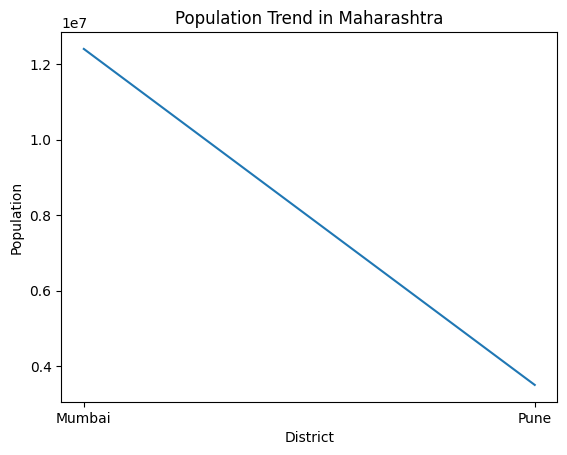

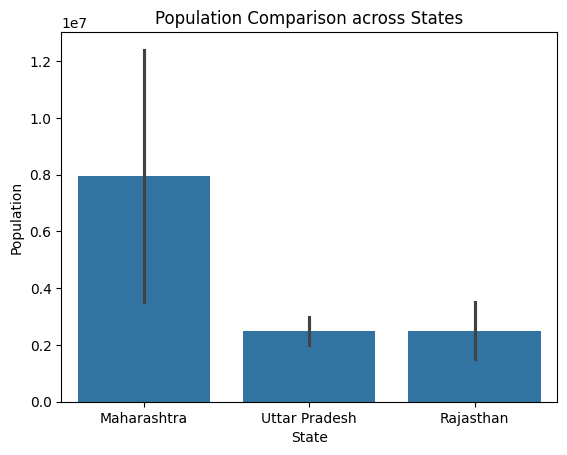

In [9]:
# Initialize the Groq client with your API key
client = Client(api_key='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')

def generate_answer(query):
    try:
        # Try to query the LLM using the Groq client
        response = client.query(query)
        return response.answer
    except AttributeError as e:
        print(f"Error: {e}")
        print("Please check the Groq API documentation for the correct method to use.")
        return None

# Test the LLM integration
query = "What is the population of Maharashtra?"
answer = generate_answer(query)
print(f"Answer: {answer}")

# Plot the population trend for Andhra Pradesh
plot_population_trend('Maharashtra')

# Compare the population across Andhra Pradesh and Maharashtra
plot_state_comparison(['Maharashtra','Uttar Pradesh','Rajasthan'])